## 기본 데이터 전처리

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from tqdm import tqdm

In [12]:
train = pd.read_csv('/mnt/c/Users/pc/Documents/github/kaggle_prep/LSR/data/train.csv')
test = pd.read_csv('/mnt/c/Users/pc/Documents/github/kaggle_prep/LSR/data/test.csv')

In [13]:
# id 열 삭제
train = train.drop(['id'], axis = 1)
test = test.drop(['id'], axis = 1)

In [15]:
# gender, vehicle_age, vehicle_damage 데이터 타입 변경
train['Gender'] = train['Gender'].map({'Male': 0, 'Female': 1})
train['Vehicle_Age'] = train['Vehicle_Age'].map({'1-2 Year' : 1, '> 2 Years' : 2, '< 1 Year' : 0})
train['Vehicle_Damage'] = train['Vehicle_Damage'].map({'Yes': 1, 'No': 0})

test['Gender'] = test['Gender'].map({'Male': 0, 'Female': 1})
test['Vehicle_Age'] = test['Vehicle_Age'].map({'1-2 Year' : 1, '> 2 Years' : 2, '< 1 Year' : 0})
test['Vehicle_Damage'] = test['Vehicle_Damage'].map({'Yes': 1, 'No': 0})

In [16]:
# Age 범주형 변경

# 구간 설정
bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, float('inf')]

# 각 구간에 대한 라벨 설정
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

# Age 열을 범주형 변수로 변환
train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels, right=False)

test['AgeGroup'] = pd.cut(test['Age'], bins=bins, labels=labels, right=False)


In [17]:
# Age 열 삭제
train = train.drop(['Age'], axis = 1)

test =  test.drop(['Age'], axis = 1)

In [18]:
# 수치형 변수 minmaxscaler
numerical = ['Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']
scaler = MinMaxScaler()
train[numerical] = scaler.fit_transform(train[numerical])
train.head()

,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,AgeGroup
0,NaN,1,0.673077,0,NaN,NaN,0.116218,0.759259,0.612457,0,0
1,NaN,1,0.538462,0,NaN,NaN,0.104702,0.154321,0.961938,1,4
2,NaN,1,0.269231,1,NaN,NaN,0.065880,0.932099,0.844291,0,1
3,NaN,1,0.019231,0,NaN,NaN,0.000000,0.956790,0.228374,0,3
4,NaN,1,0.288462,1,NaN,NaN,0.054547,0.932099,0.982699,0,3


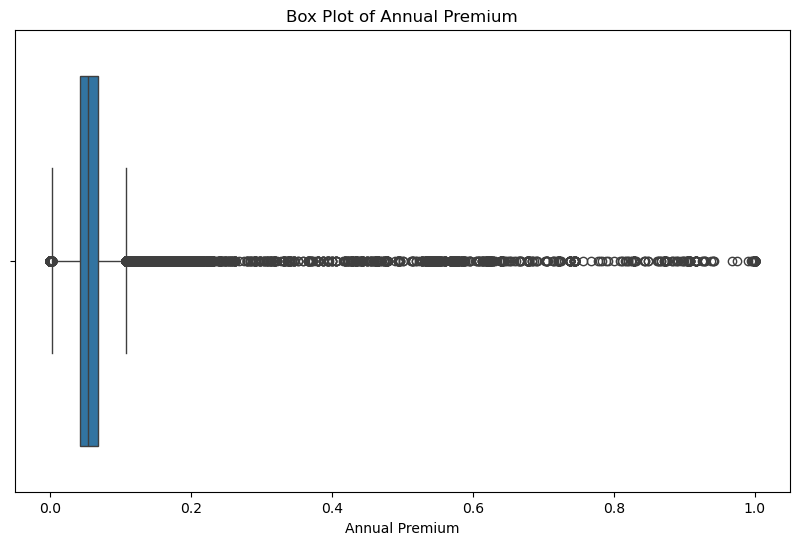

In [19]:
# Annual_Premium 박스플롯
plt.figure(figsize=(10, 6))
sns.boxplot(x=train['Annual_Premium'])
plt.title('Box Plot of Annual Premium')
plt.xlabel('Annual Premium')
plt.show()

## 이상치 데이터 제거

In [20]:
# IQR을 이용하여 이상치 제거
Q1 = train['Annual_Premium'].quantile(0.25)
Q3 = train['Annual_Premium'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치가 있는 행 제거
deleted_train = train[(train['Annual_Premium'] >= lower_bound) & (train['Annual_Premium'] <= upper_bound)]



deleted_train.shape

(9127525, 11)

In [21]:
# IQR을 이용하여 이상치 제거
Q1 = test['Annual_Premium'].quantile(0.25)
Q3 = test['Annual_Premium'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치가 있는 행 제거
deleted_test = test[(test['Annual_Premium'] >= lower_bound) & (test['Annual_Premium'] <= upper_bound)]



deleted_test.shape

(6087878, 10)

In [22]:
df = deleted_train
df_test = deleted_test

In [11]:
X, y 데이터
X = df.drop('Response', axis = 1)
y = df['Response']

In [11]:
#데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# 데이터 표준화 (standardscaler)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# 데이터 표준화 (minmaxscaler)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# X_test

In [13]:
df.dtypes

Gender                     int64
Driving_License            int64
Region_Code              float64
Previously_Insured         int64
Vehicle_Age                int64
Vehicle_Damage             int64
Annual_Premium           float64
Policy_Sales_Channel     float64
Vintage                    int64
Response                   int64
AgeGroup                category
dtype: object

In [16]:
from pycaret.classification import *

exp_clf = setup(session_id = 42, data = df, target='Response', 
                normalize = True, normalize_method='minmax', 
                transformation=True,use_gpu= True)

KeyError: 'Name'